In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [30]:
# I'm just providing a few ways of organizing the data...


titles_data <- read_csv("data/titles.csv")

titles_movie_data <- titles_data %>%
    filter(release_year == 2022, type == "MOVIE", tmdb_popularity < 500) %>% #, age_certification != "NA", imdb_id != "NA" ) %>%
    select(-description, -seasons, -type, -id, -release_year, -genres, -production_countries)

    
titles_movie_data
titles_split <- initial_split(titles_movie_data, prop = 0.75 , strata = tmdb_popularity)
titles_training <- training(titles_split)
titles_testing <- testing(titles_split)


Rows: 5850 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): id, title, type, description, age_certification, genres, production...
dbl (7): release_year, runtime, seasons, imdb_score, imdb_votes, tmdb_popula...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


title,age_certification,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
RRR,R,187,tt8178634,8.0,87515,53.526,7.800
Persuasion,PG,107,tt13456318,NA,NA,127.205,6.000
Girl in the Picture,R,102,tt21059520,7.3,9786,219.908,7.196
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Celeb Five: Behind the Curtain,NA,55,tt18570468,4.7,29,1.674,5
Kongsi Raya,NA,102,tt16806990,7.0,66,2.112,NA
Sun of the Soil,NA,26,NA,NA,NA,1.179,7


In [33]:

titles_mean <- titles_training %>%
    select(runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score) %>%
    map_df(mean, na.rm = TRUE)
titles_mean

titles_max <- titles_training %>%
    select(runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score) %>%
    map_df(max, na.rm = TRUE)

titles_min <- titles_training %>%
    select(runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score) %>%
    map_df(min, na.rm = TRUE)

titles_range <- titles_max - titles_min
titles_range

runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
94.23913,5.917742,6107.238,69.04359,6.38553


runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
167,6.6,61780,465.946,5.3


Warning message:
“Removed 11 rows containing missing values (geom_point).”


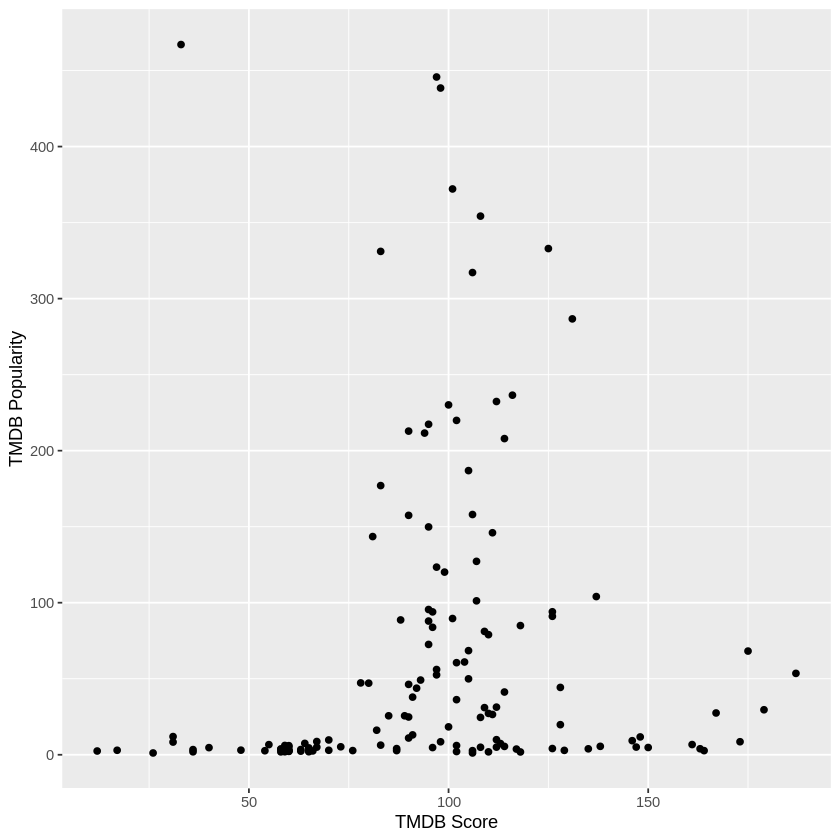

Warning message:
“Removed 12 rows containing missing values (geom_point).”


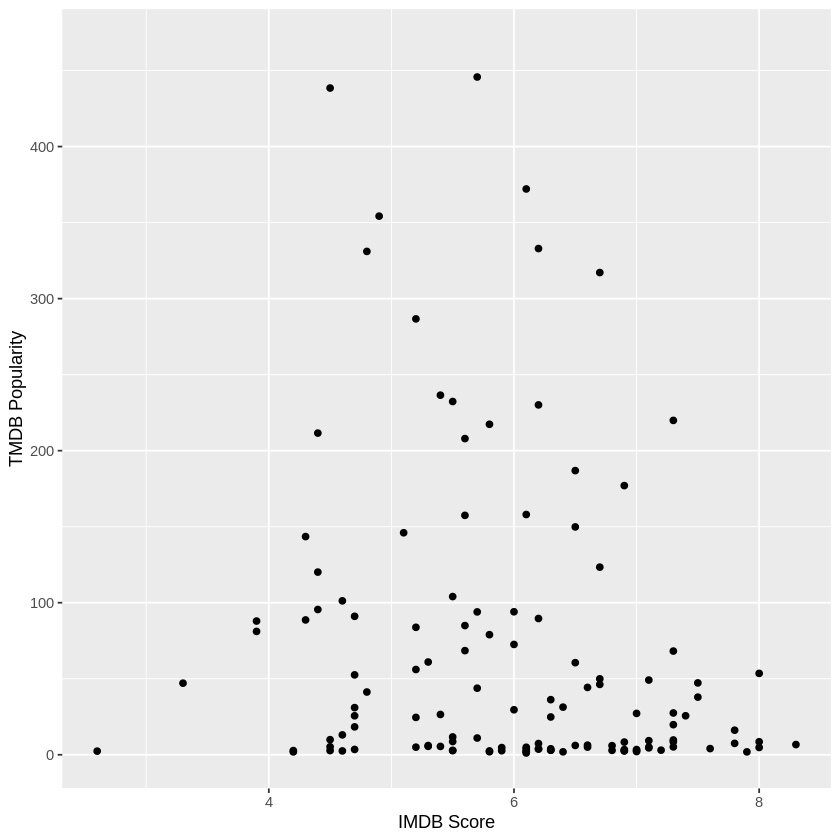

Warning message:
“Removed 4 rows containing missing values (geom_point).”


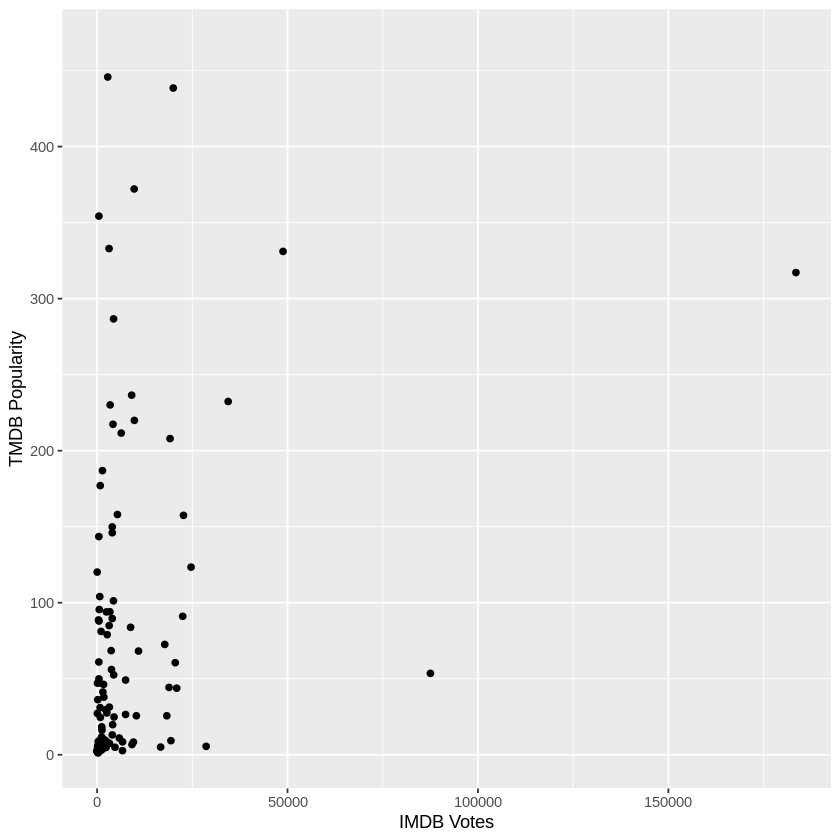

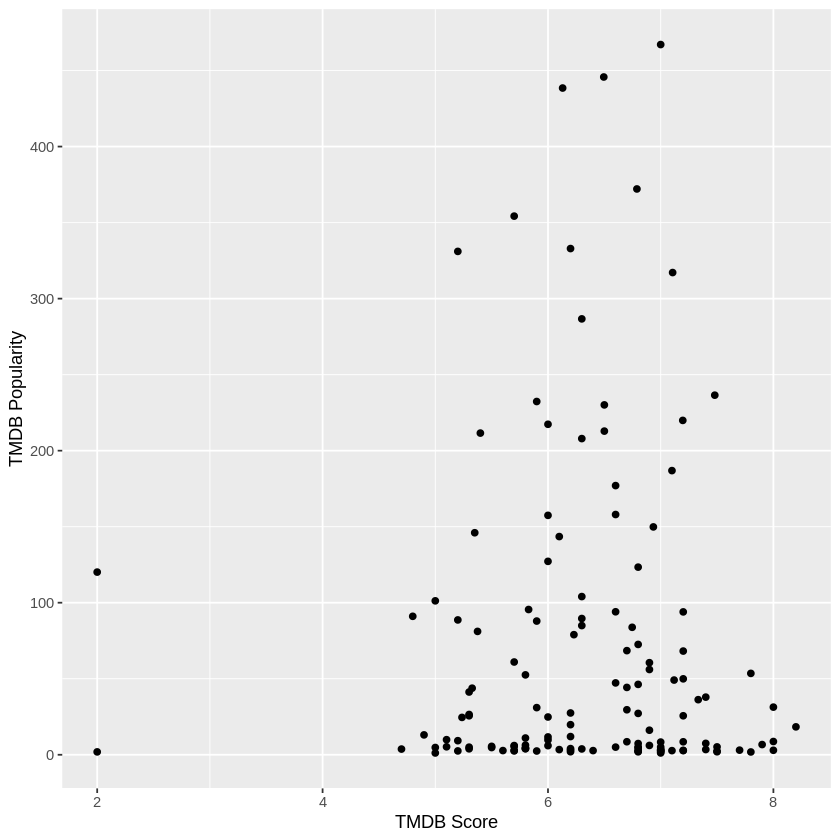

In [29]:
iscore_plot <- titles_training %>%
    ggplot(aes(x = imdb_score, y = tmdb_popularity)) +
    geom_point() +
    labs(x = "IMDB Score", y ="TMDB Popularity")

ivotes_plot <- titles_training %>%
    ggplot(aes(x = imdb_votes, y = tmdb_popularity)) +
    geom_point() +
    labs(x = "IMDB Votes", y ="TMDB Popularity")

tscore_plot <- titles_training %>%
    ggplot(aes(x = tmdb_score , y = tmdb_popularity)) +
    geom_point() +
    labs(x = "TMDB Score", y ="TMDB Popularity")

runtime_plot <- titles_training %>%
    ggplot(aes(x = runtime, y = tmdb_popularity)) +
    geom_point() +
    labs(x = "TMDB Score", y ="TMDB Popularity")

par(mfrow=c(1, 4))
runtime_plot
iscore_plot
ivotes_plot
tscore_plot

In [ ]:
source('cleanup.R')